In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from mynn.layers.dense import dense
from mynn.activations.sigmoid import sigmoid
from mynn.optimizers.sgd import SGD
import time
%matplotlib notebook

General function to perform a poll to the AlphaVantage API.

In [2]:
def poll_alphavantage(symbol, 
                      function="TIME_SERIES_INTRADAY", 
                      interval=30, 
                      full=False):
    """
    Polls the AlphaVantage API for a json dictionary,
    representing time series data.
    
    Parameters
    ----------
        symbol : string
            Symbol representing which time series to
            read from the API
            
        function : string, optional(default="TIME_SERIES_INTRADAY")
            Set this to TIME_SERIES_DAILY to avoid minute-to-minute calls.
            
        interval : int, optional(default=30)
            Time interval in minutes to poll intraday calls
            
        full : boolean, optional(default=False)
            Whether to read entire database for intraday calls
            
    Returns
    -------
        dictionary
            See AlphaVantage docs at https://www.alphavantage.co/documentation/
            for implementation details.
    """
    
    assert interval in [1,5,15,30,60], ("Invalid time interval %d minutes." % interval)
    
    #Ian's AlphaVantage API key
    APIKEY = "1VO7G21TDUI9893B"
    
    #set up alphavantage api call
    url = "https://www.alphavantage.co/query?"
    
    #load parameters to call alphavantage api
    url += "function=" + function
    url += "&symbol=" + symbol
    if function == "TIME_SERIES_INTRADAY":
        url += "&interval=%dmin" % interval
    if full:
        url += "&outputsize=full"
    url += "&apikey=" + APIKEY

    req = requests.get(url)
    return json.loads(req.text)

Relatively simple function to get a closing series at a given interval.

In [3]:
def intraday_closing_series(symbol, interval=30, normalized=False):
    data = poll_alphavantage(symbol, interval=interval)

    if "Error Message" in data.keys():
        print(data["Error Message"])
        return
    if "Information" in data.keys():
        print(data["Information"])
        return
    
    ts_key = "Time Series (%dmin)" % interval
    date_keys = sorted(list(data[ts_key]))
    
    closing_series = np.array([float(data[ts_key][date_key]['4. close']) for date_key in date_keys])
    if normalized:
        closing_series /= np.max(closing_series)
        
    return closing_series

In [4]:
def daily_closing_series(symbol, normalized=False, full=False):
    data = poll_alphavantage(symbol, function="TIME_SERIES_DAILY", full=full)
    
    if "Error Message" in data.keys():
        print(data["Error Message"])
        return
    if "Information" in data.keys():
        print(data["Information"])
        return
        
    ts_key = "Time Series (Daily)"
    date_keys = sorted(list(data[ts_key]))
    
    closing_series = np.array([float(data[ts_key][date_key]['4. close']) for date_key in date_keys])
    if normalized:
        closing_series /= np.max(closing_series)
        
    return closing_series

In [5]:
x = daily_closing_series("AAPL", normalized=True)

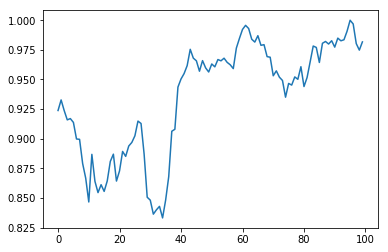

In [6]:
fig, ax = plt.subplots()

ax.plot(x)

In [ ]:
with open("data/SP500.txt", "r") as f:
    symbols = f.read().strip().split(',')

for symbol in symbols[20:]:
    print("Loading stock " + symbol)
    series = daily_closing_series(symbol, normalized=True, full=True)
    with open("data/" + symbol + ".txt", "w") as f:
        f.write(str(series.tolist()))
    time.sleep(15)

Loading stock ALGN
Loading stock ALLE
Loading stock AGN
Loading stock ADS
Loading stock LNT
Loading stock ALL
Loading stock GOOGL
Loading stock GOOG
Loading stock MO
Loading stock AMZN
Loading stock AEE
Loading stock AAL
Loading stock AEP
Loading stock AXP
Loading stock AIG
Loading stock AMT
Loading stock AWK
Loading stock AMP
Loading stock ABC
Loading stock AME
Loading stock AMGN
Loading stock APH
Loading stock APC
Loading stock ADI
Loading stock ANDV
Loading stock ANSS
Loading stock ANTM
Loading stock AON
Loading stock AOS
Loading stock APA
Loading stock AIV
Loading stock AAPL
Loading stock AMAT
Loading stock APTV
Loading stock ADM
Loading stock ARNC
Loading stock AJG
Loading stock AIZ
Loading stock T
Loading stock ADSK
Loading stock ADP
Loading stock AZO
Loading stock AVB
Loading stock AVY
Loading stock BHGE
Loading stock BLL
Loading stock BAC
Loading stock BK
Loading stock BAX
Loading stock BBT
Loading stock BDX
Loading stock BRK.B
Loading stock BBY
Loading stock BIIB
Loading stock

In [190]:
encoder = AutoEncoder(100, 20)

sgd = SGD(encoder.parameters, learning_rate=0.01)

<IPython.core.display.Javascript object>


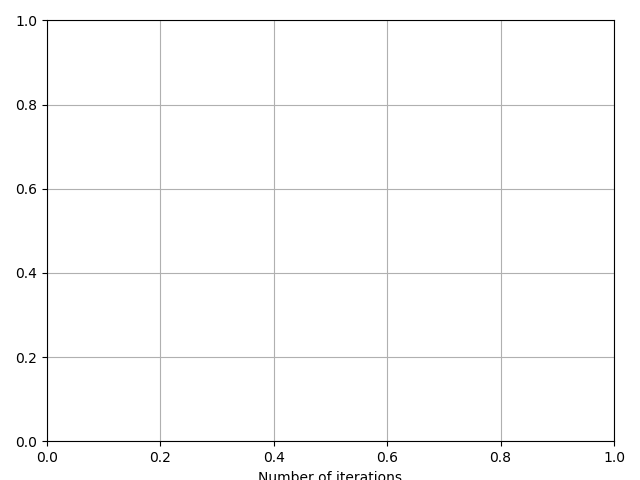

In [194]:
import liveplot
plotter, fig, ax = liveplot.create_plot(metrics=["w_grad"], refresh=2.5)

In [ ]:
for epoch_cnt in range(1000):
    idxs = np.arange(len(train_data))  # -> array([0, 1, ..., 9999])
    np.random.shuffle(idxs)  
    
    for batch_cnt in range(0, len(train_data)//batch_size):
        batch_indices = idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
        batch = train_data[batch_indices]  # random batch of our training data
        
        out1 = sigmoid(mg.matmul(batch, w) + b)
        prediction = mg.matmul(out1, v) 

        truth = true_f(batch)
        loss = l1_loss(prediction, truth)
        loss.backward()
        plotter.set_train_batch({"w_grad" : w.grad.mean()},
                               batch_size=batch_size)
        grad_descent((w, b, v), lr)

        loss.null_gradients()

fig, ax = plt.subplots()
ax.plot(train_data, true_f(x))
ax.plot(train_data, forward_pass(x, w, b, v).data)